In [1]:
import pandas
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pandas.read_csv('dataset.csv')

In [3]:
x=dataset.iloc[:,0:1].values
y=dataset.iloc[:,1].values
y = y.reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42, shuffle = False)
print(x_train, x_test, y_train, y_test)

[[1987]
 [1988]
 [1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]] [[2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]] [[2361]
 [2192]
 [2568]
 [2589]
 [2537]
 [3241]
 [2945]
 [3060]
 [3050]
 [3393]
 [3761]
 [2853]
 [3844]
 [3739]
 [4155]
 [4067]
 [4104]
 [4299]
 [4361]
 [4305]
 [4425]
 [4246]
 [3793]
 [4213]
 [3861]] [[4456]
 [4338]
 [4682]
 [4251]
 [4223]
 [4286]
 [4344]
 [4287]
 [4188]
 [4331]
 [4283]]


In [10]:
Yield_svr = SVR(kernel = 'poly', C = 10, degree = 1, gamma = 0.1)
Yield_svr.fit(x_test, y_test)
Yieldlin = SVR(kernel = 'linear', C = 10, degree = 1)
Yieldlin.fit(x_test, y_test)
Yieldrbf = SVR(kernel = 'rbf', C = 100, gamma = 0.1)
Yieldrbf.fit(x_test, y_test)

C:\Users\Jem\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jem\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jem\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma=0.1)

In [15]:
y_pred = Yield_svr.predict(x_test)
y_pred2 = Yieldlin.predict(x_test)
y_pred3 = Yieldrbf.predict(x_test)

In [16]:
Yield_svr.predict((np.array(2016)).reshape(-1,1))

array([4319.53846873])

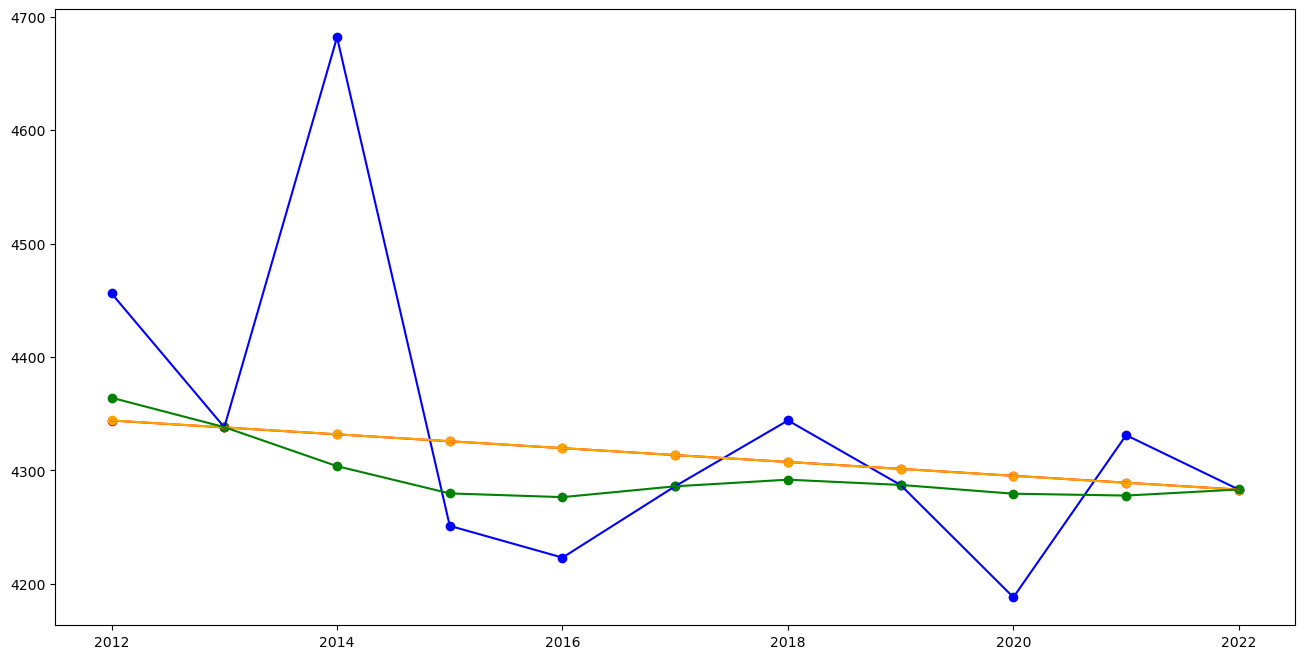

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(x_test,y_test, color = 'blue')
plt.scatter(x_test,y_pred.reshape(-1,1), color = 'red')
plt.plot(x_test,y_test, color = 'blue')
plt.plot(x_test, y_pred.reshape(-1,1), color = 'red')
plt.scatter(x_test,y_pred2.reshape(-1,1), color = 'orange')
plt.plot(x_test,y_pred2.reshape(-1,1), color = 'orange')
plt.scatter(x_test, y_pred3.reshape(-1,1), color = 'green')
plt.plot(x_test,y_pred3.reshape(-1,1), color = 'green')
plt.show()
